In [1]:
import tensorflow as tf
import numpy as np
fashion_mnist  = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train=np.expand_dims(x_train, axis = -1)
x_test=np.expand_dims(x_test, axis = -1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 236s 9us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 8s 2us/step


In [2]:
# 모델 정의
# 필터 32, 필터크기 3x3, 
model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same',
                          activation='relu', input_shape=(28, 28,1)),
   tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
   tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), strides=(1,1), padding='same', 
                          activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(10, activation='softmax')
])
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 모델 학습
model.fit(x_train, y_train, epochs=5, verbose=1)
# accuracy 정확도, loss: 정답과의 오차

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7381 - loss: 0.7250
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8663 - loss: 0.3756
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8826 - loss: 0.3295
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8936 - loss: 0.2971
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9001 - loss: 0.2806


In [3]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - 5ms/step - accuracy: 0.8952 - loss: 0.2940


[0.29401570558547974, 0.8952000141143799]

In [4]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(x_train, y_train, validation_data=(x_test,  y_test), epochs=5, verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9059 - loss: 0.2611 - val_accuracy: 0.8996 - val_loss: 0.2787
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9103 - loss: 0.2482 - val_accuracy: 0.8968 - val_loss: 0.2997
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9149 - loss: 0.2396 - val_accuracy: 0.9038 - val_loss: 0.2707
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9164 - loss: 0.2333 - val_accuracy: 0.9009 - val_loss: 0.2760
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9177 - loss: 0.2277 - val_accuracy: 0.9049 - val_loss: 0.2677


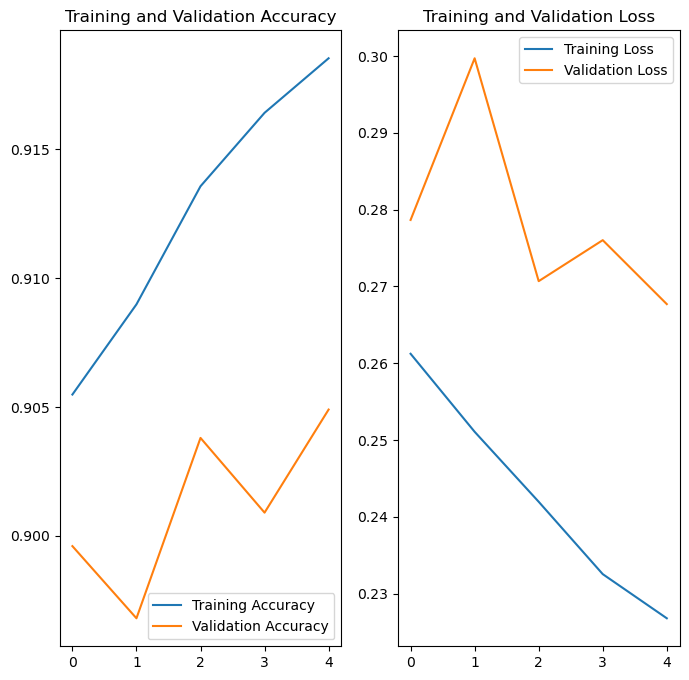

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range = range(5)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [6]:
# 모델 생성
model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same',
                          activation='relu', input_shape=(28, 28,1)),
   tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
   tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), strides=(1,1), padding='same', 
                          activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(10, activation='softmax')
])
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 모델 학습
history=model.fit(x_train, y_train, validation_data=(x_test,  y_test), 
                  epochs=10, verbose=1)

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7389 - loss: 0.7418 - val_accuracy: 0.8586 - val_loss: 0.3974
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8589 - loss: 0.3927 - val_accuracy: 0.8783 - val_loss: 0.3470
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8781 - loss: 0.3489 - val_accuracy: 0.8858 - val_loss: 0.3265
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8821 - loss: 0.3294 - val_accuracy: 0.8880 - val_loss: 0.3157
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8907 - loss: 0.3027 - val_accuracy: 0.8941 - val_loss: 0.2956
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8929 - loss: 0.2973 - val_accuracy: 0.8976 - val_loss: 0.2916
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8968 - loss: 0.2909 - val_accuracy: 0.8970 - val_loss: 0.2840
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8994 - loss

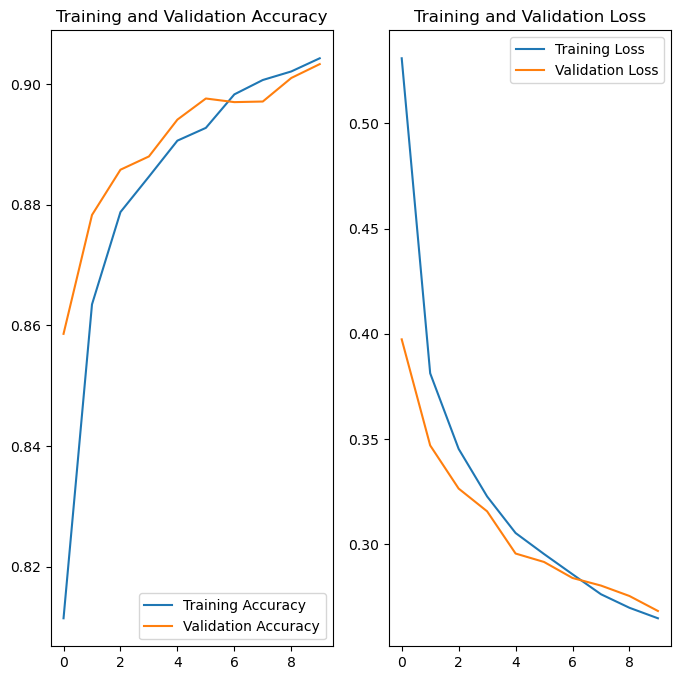

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
def showImage(imgs, labels, preds):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    n=len(imgs)
    f=plt.figure()
    f.gca().set_axis_off()
    plt.margins(0, 0)
    for i in range(n):
        if(not np.any(imgs[i])):
            continue
        if(n<4):
            f.add_subplot(1,n,i+1)
        else:
            g_w=int(np.math.ceil(n/2))
            f.add_subplot(2,g_w,i+1)
        f.gca().xaxis.set_major_locator(plt.NullLocator())
        f.gca().yaxis.set_major_locator(plt.NullLocator())
        img=imgs[i].copy()
        img=np.squeeze(img,axis=-1)
        img=(img*255).astype(np.uint8)
        plt.imshow(img, cmap='gray',vmin=0, vmax=255, interpolation='none')
        ax=plt.gca()
        ax.set_xlabel(class_names[preds[i]],fontsize=10)
        if(preds[i]==labels[i]):
            ax.xaxis.label.set_color('blue')
        else:
            ax.xaxis.label.set_color('red')
    plt.tight_layout(pad=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


C:\Users\user\AppData\Local\Temp\ipykernel_4912\4031828892.py:14: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  g_w=int(np.math.ceil(n/2))


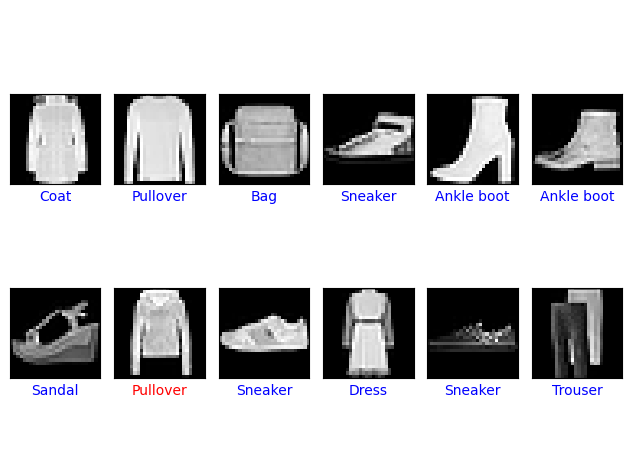

In [9]:
samples=np.random.choice(x_test.shape[0],12)
x_predict=x_test[samples,:,:]
y_predict=y_test[samples]
result=model.predict(x_predict)
preds=np.argmax(result, axis=1)
showImage(x_predict, y_predict, preds)